In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("Set1")
import numpy as np
import scipy

In [2]:
df_5k6params = pd.read_csv("data/5kparamsresults-measurestd.csv")
df_5k6params = df_5k6params.rename(columns = {"n_issues": "n"})

nonandf = df_5k6params.dropna()

In [3]:
stds_imagenames = ["img/initstd-measurestd.png", "img/Ystd*-measurestd.png",
                   "img/Ystd**-measurestd.png", "img/Ystd***-measurestd.png" ]

stds_columns = [nonandf["Initstd"], nonandf["Ystd★"],
               nonandf["Ystd★★"], nonandf["Ystd★★★"]]

stds_titles = [" System Initial conditions ", 
               "System's final states for p*",
               " System's final states for p**",
               " System's final states for p***"]


In [11]:
nonandf.head()

N  n         p         σ         ρ  p_intran     Ystd★    Ystd★★  \
0  1489  2  0.561514  0.341611  0.028027  0.272168  0.071531  0.043227   
1   707  2  0.561514  0.341611  0.028027  0.272168  0.074880  0.037759   
2  1489  9  0.561514  0.341611  0.028027  0.272168  0.027708  0.012557   
3  1489  2  0.545869  0.341611  0.028027  0.272168  0.072339  0.046106   
4  1489  2  0.561514  0.043975  0.028027  0.272168  0.151628  0.041689   

    Ystd★★★   Initstd  
0  0.042085  0.030837  
1  0.037314  0.030662  
2  0.013380  0.018873  
3  0.048847  0.032717  
4  0.041006  0.034844

/home/marcelovmaciel/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


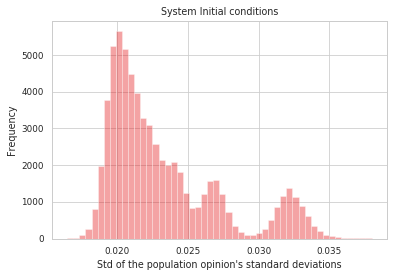

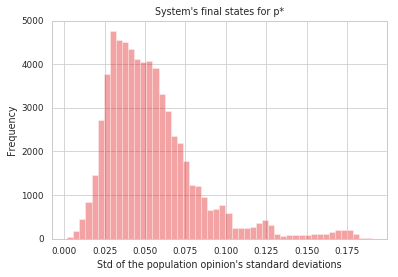

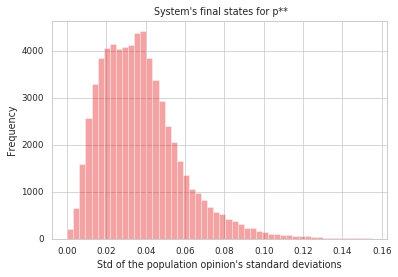

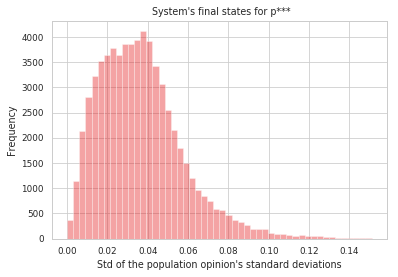

[None, None, None, None]

In [7]:
def plotdist(dfcolumn, imagename, title):
    sns.distplot(dfcolumn, kde = False)
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel("Std of the population opinion's standard deviations")
    plt.savefig(imagename, dpi = 200)
    plt.show()
listmap = lambda fn,data: list(map(fn,data))


listmap(lambda x: plotdist(*x), zip(stds_columns,stds_imagenames, stds_titles))

In [5]:
def saveregressionplot(df,xvar,yvar, whichp):

    fig1, ax1 = plt.subplots(1, dpi = 200)
    sns.regplot(xvar, df[yvar], data = df, 
                scatter_kws= {'alpha':0.2, 's':4, 'color':'gray'},
                color='k',  fit_reg=False)
    ax1.set_xlabel(xvar,  fontsize = 12, 
                   color = "gray", fontweight= "bold")
    ax1.set_ylabel(yvar,  fontsize = 12, 
                   color = "gray", fontweight= "bold")
    plt.savefig("img/regression{}{}-measure-std.png".format(whichp,xvar), dpi = 200)
    plt.show()

def dfregplots(df, yvar, whichp):
    for column in list(df.columns.values[0:6]):
        saveregressionplot(df,column, yvar, whichp)

    

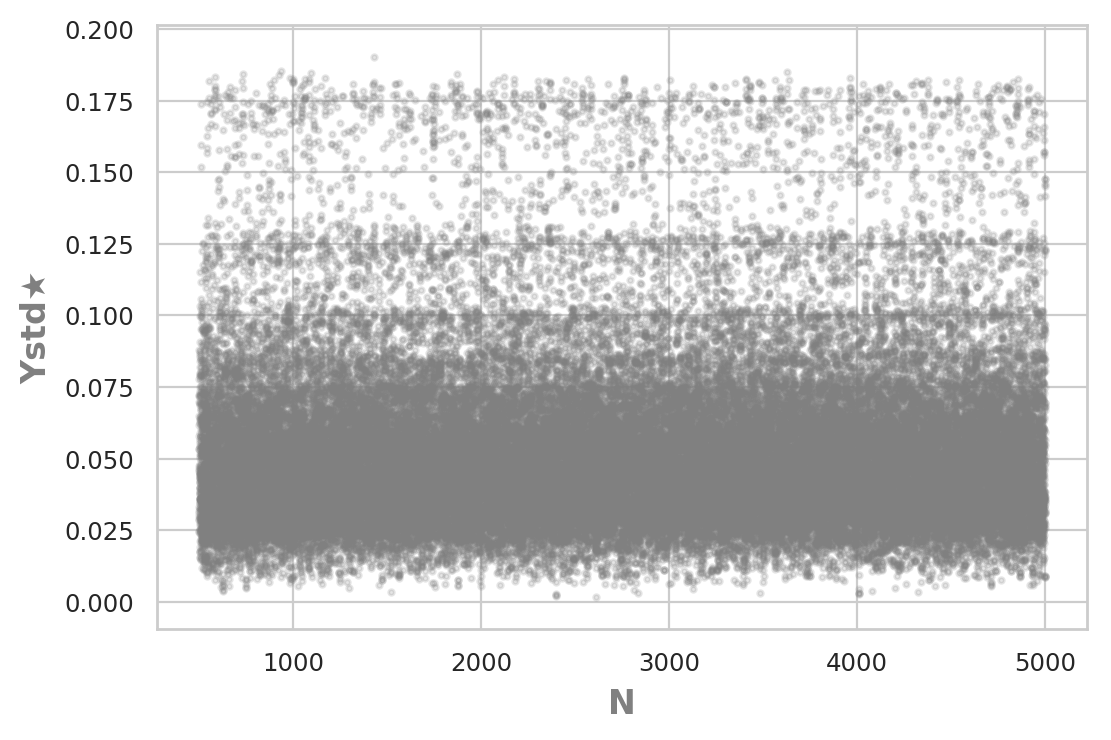

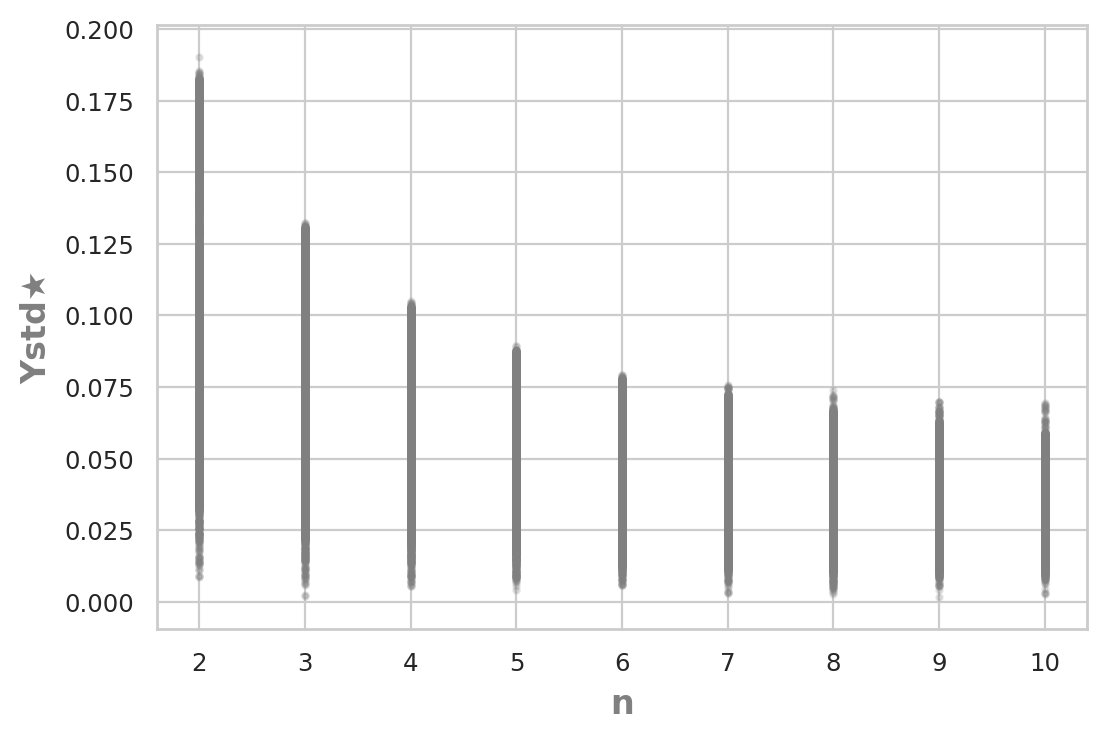

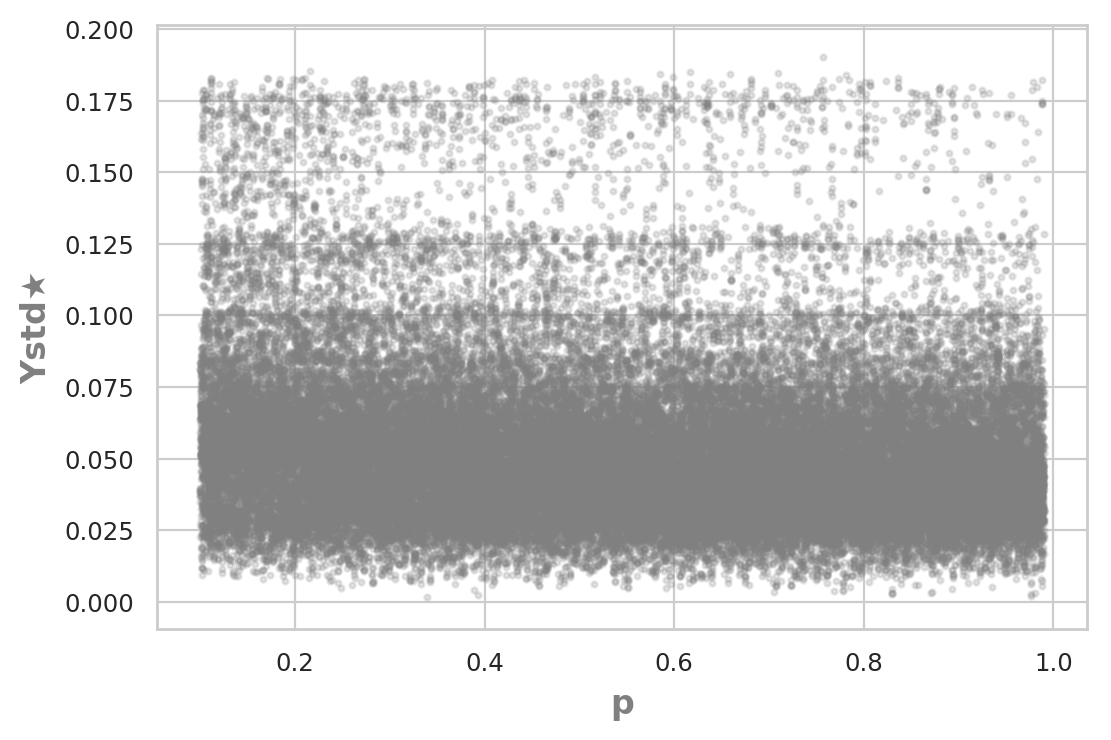

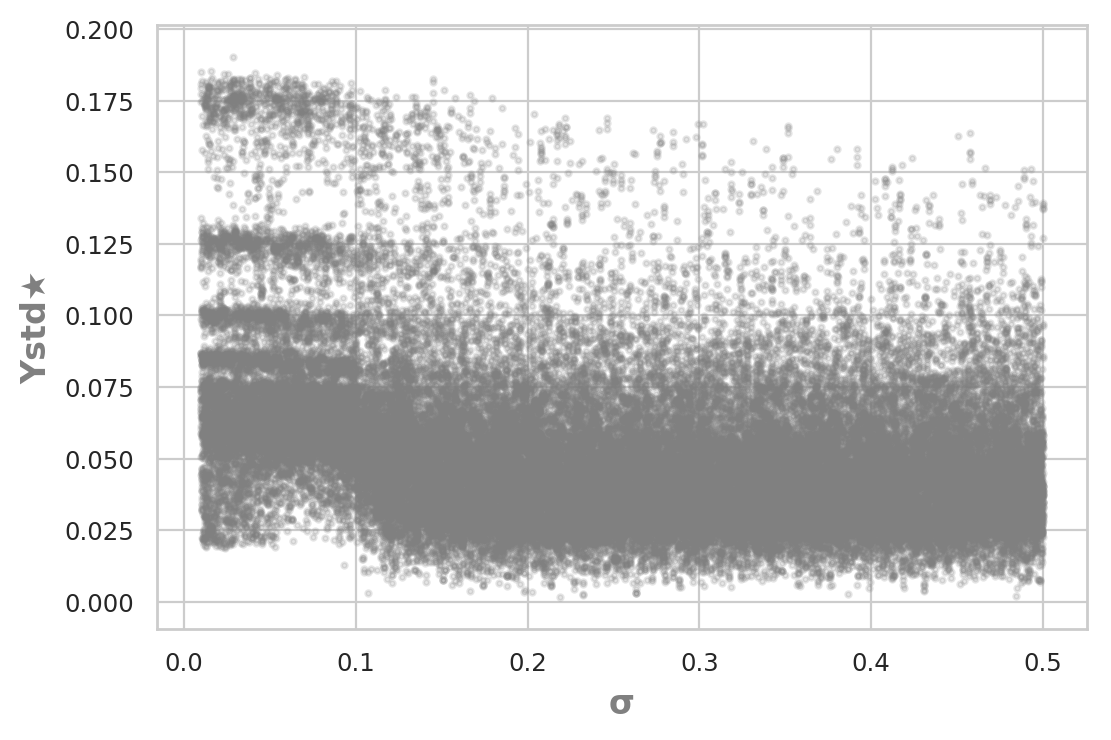

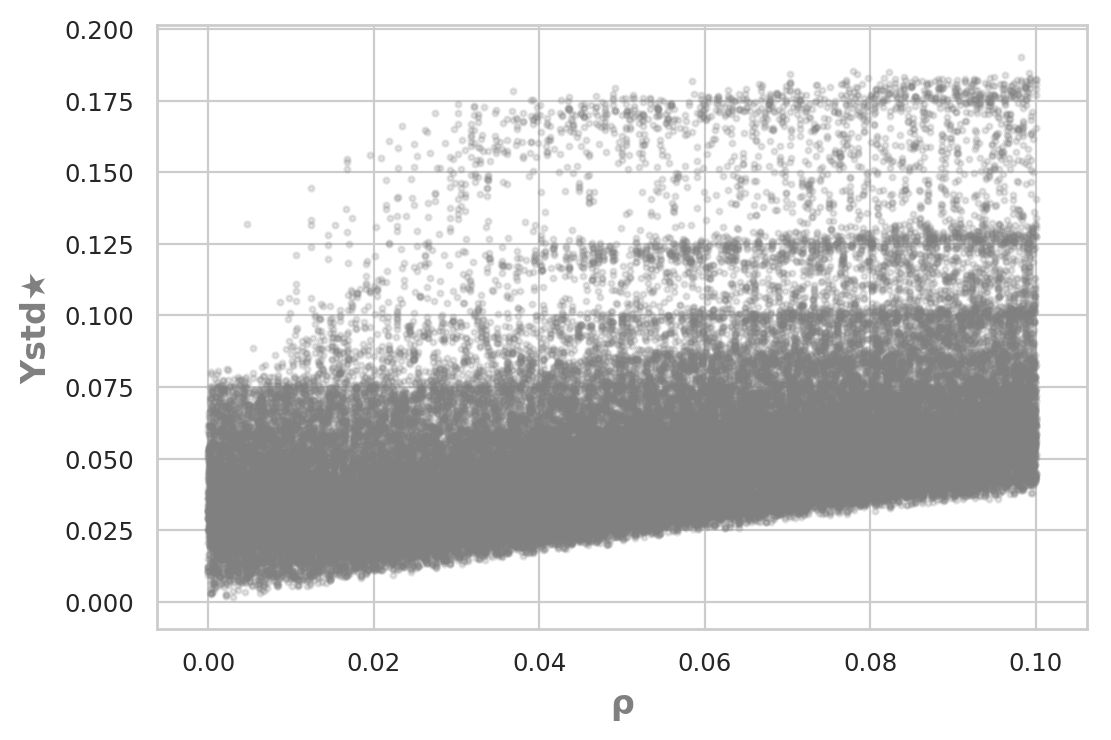

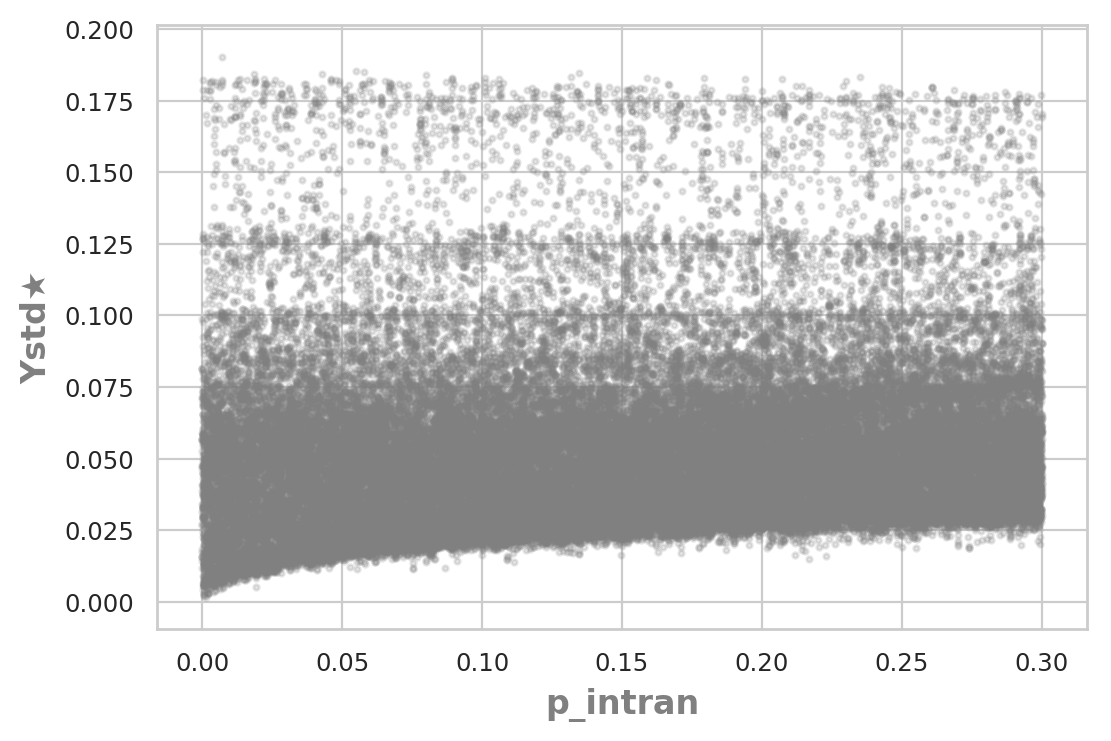

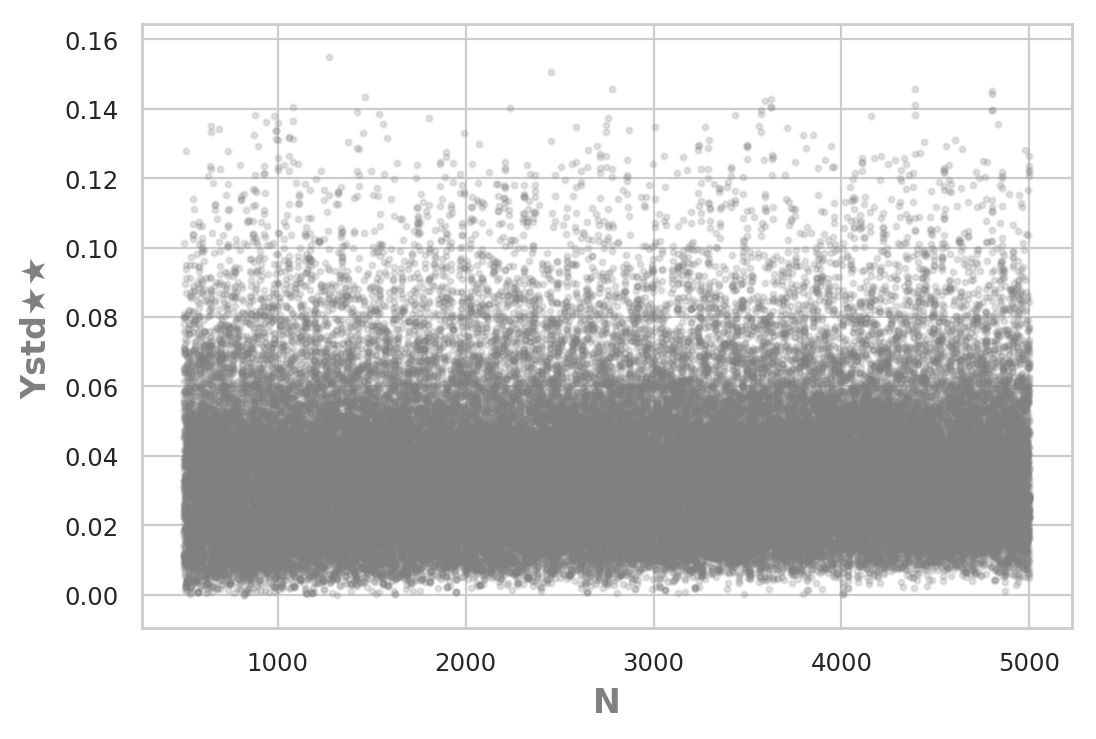

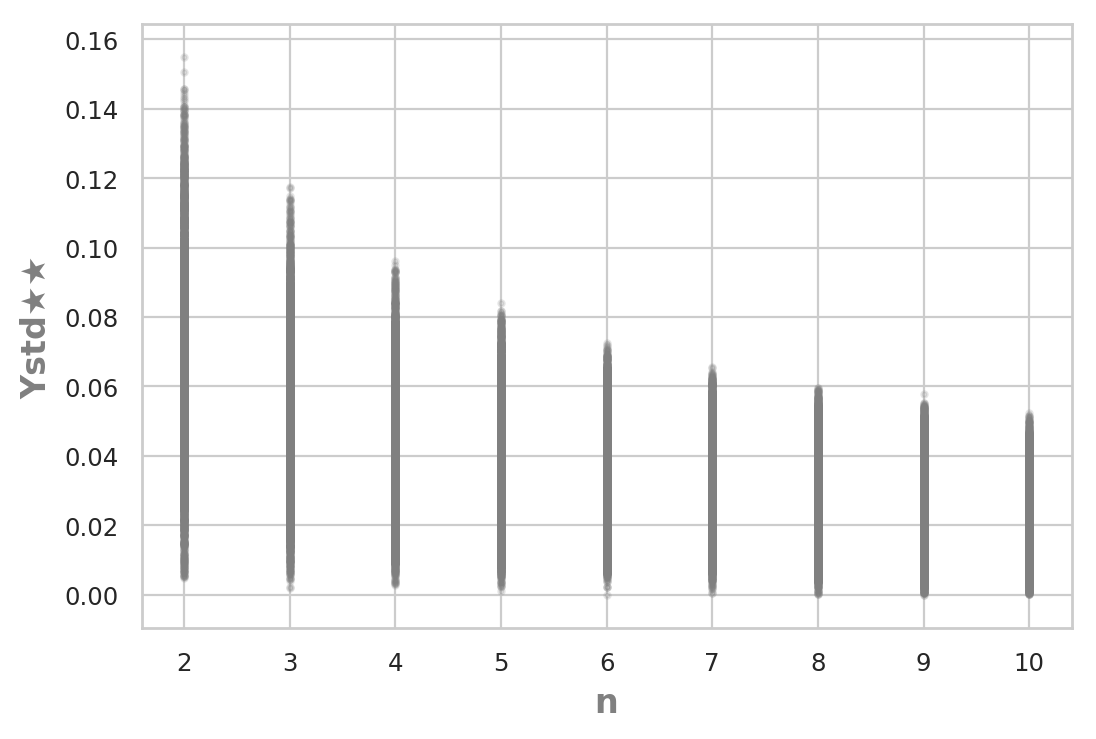

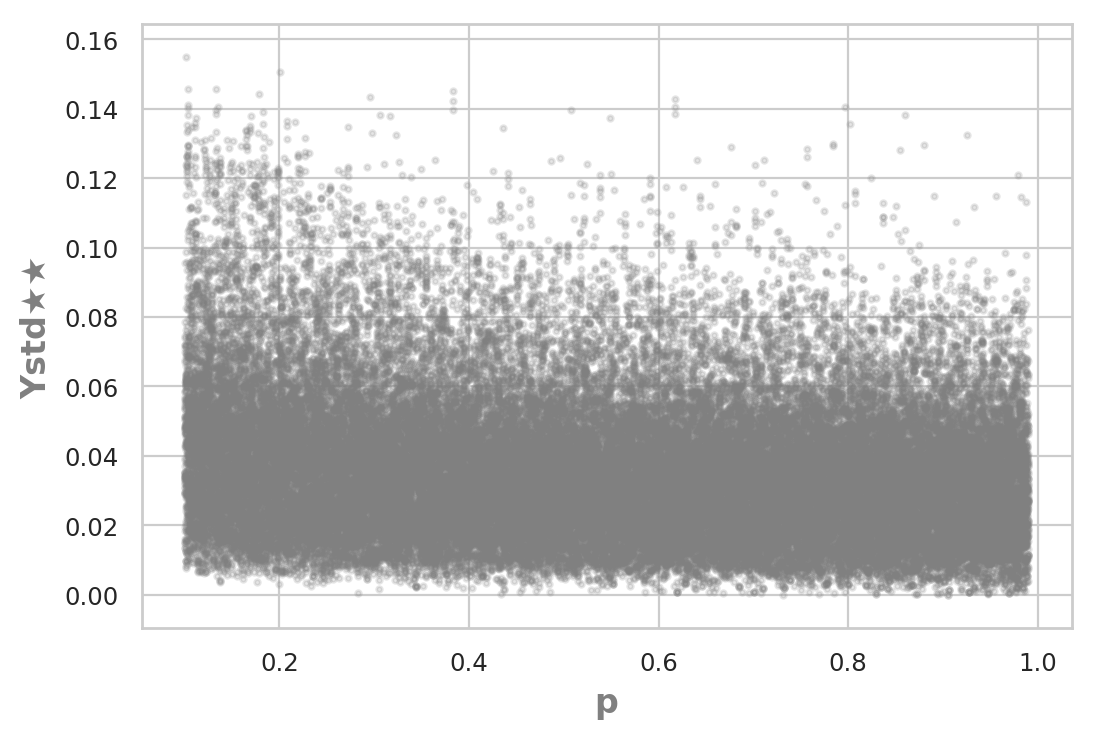

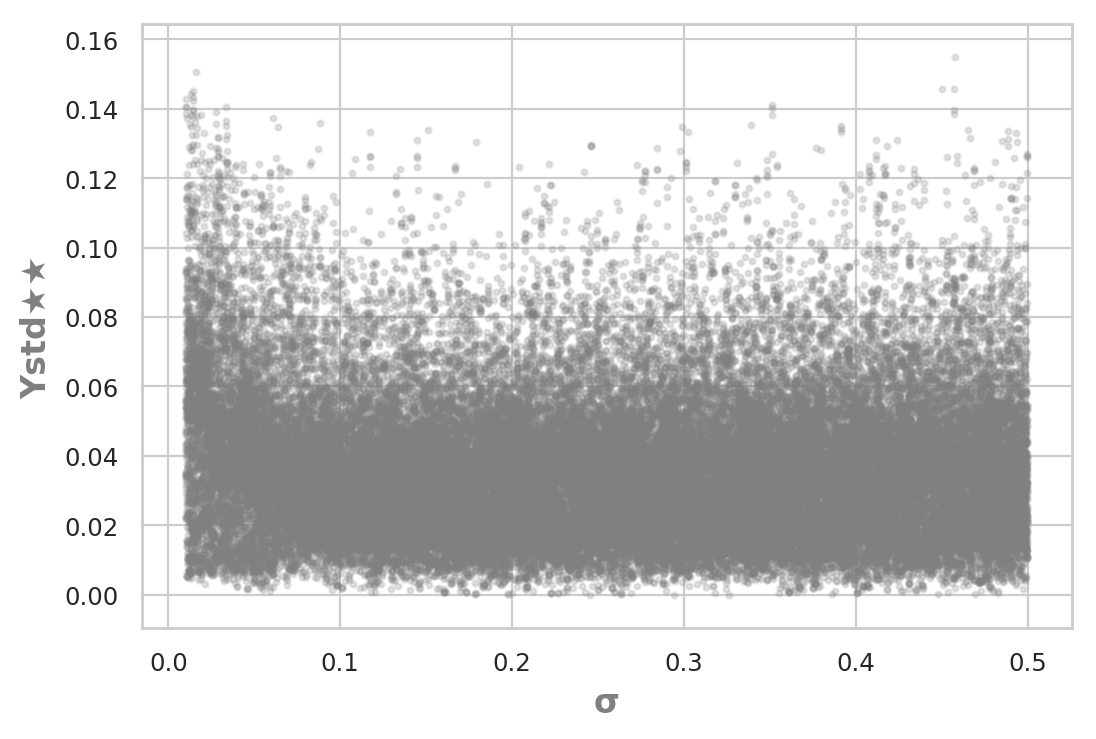

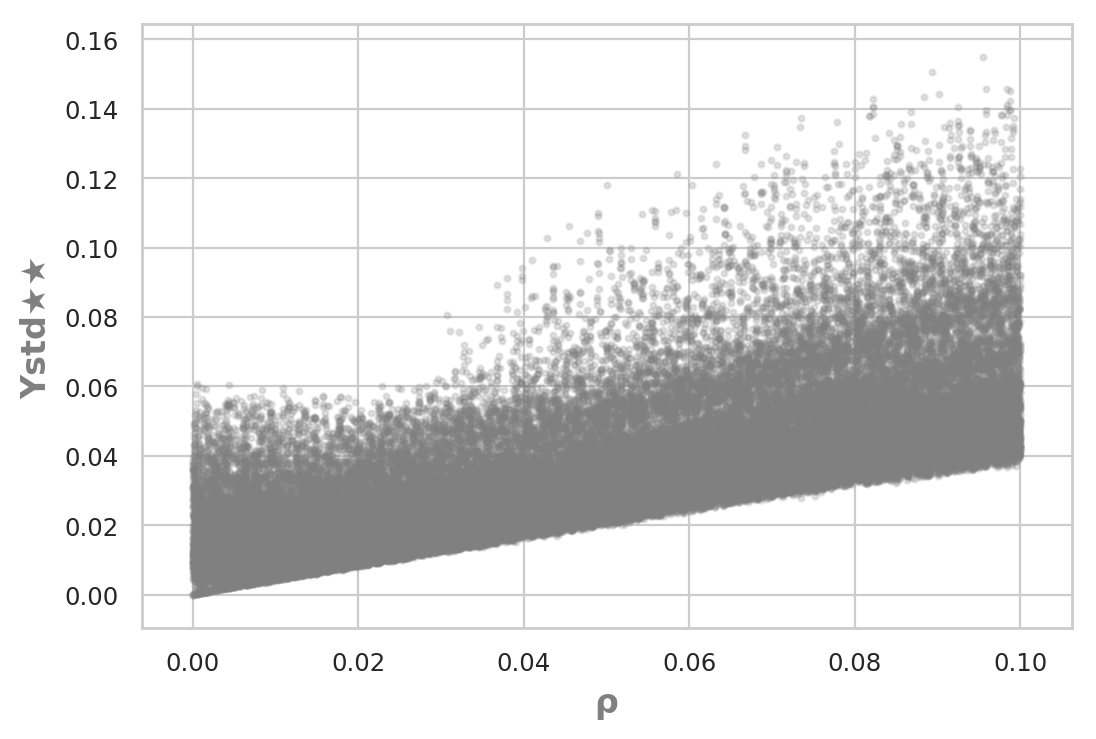

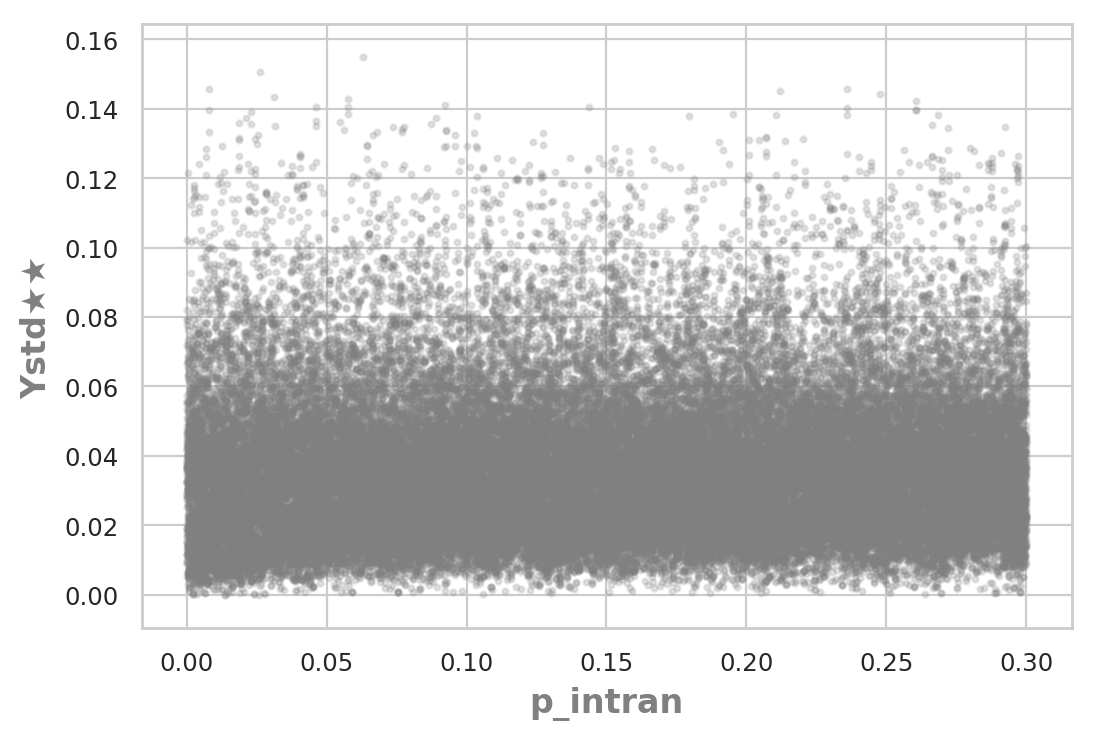

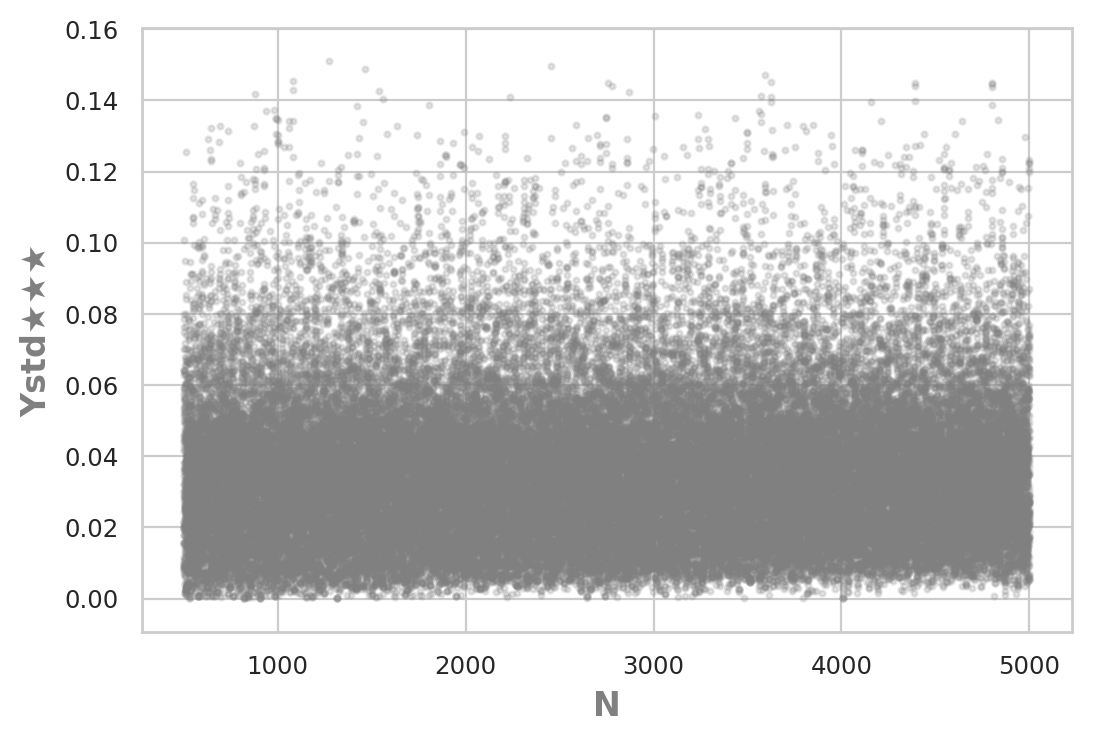

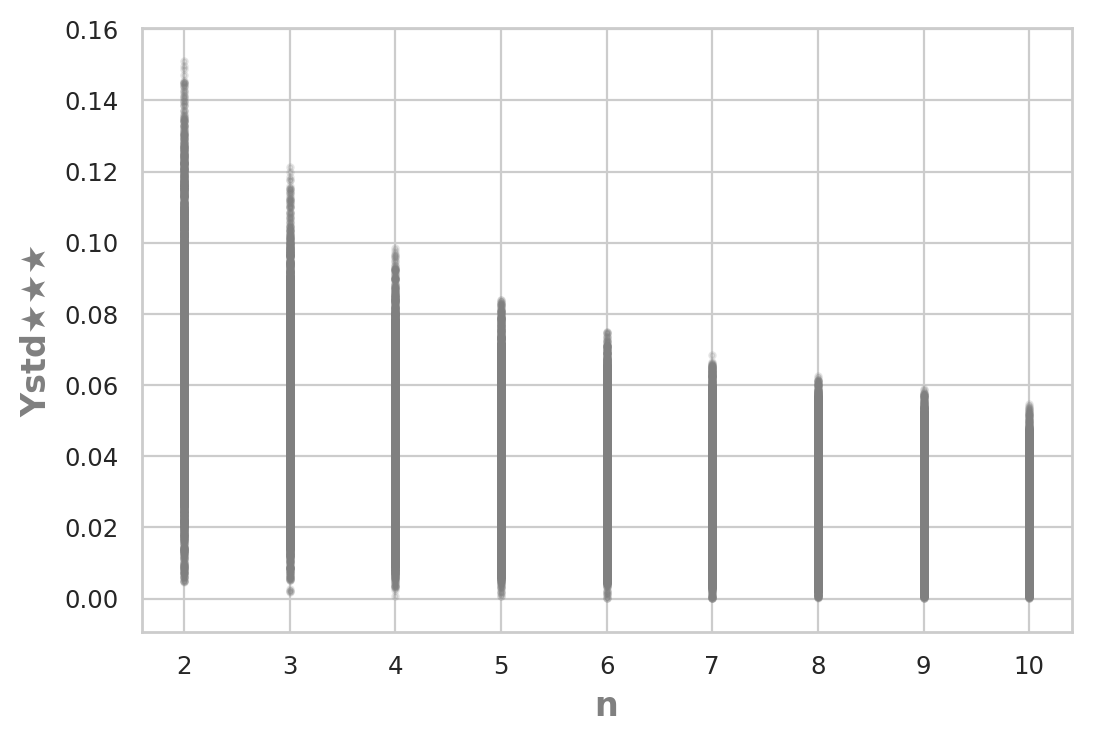

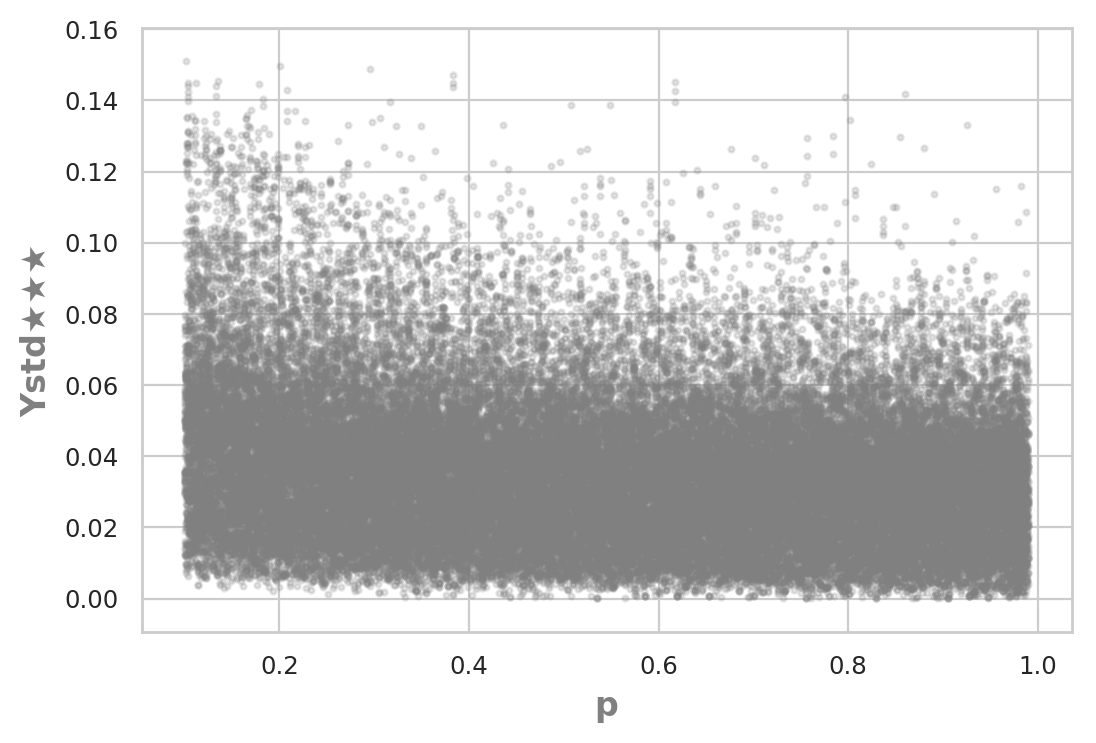

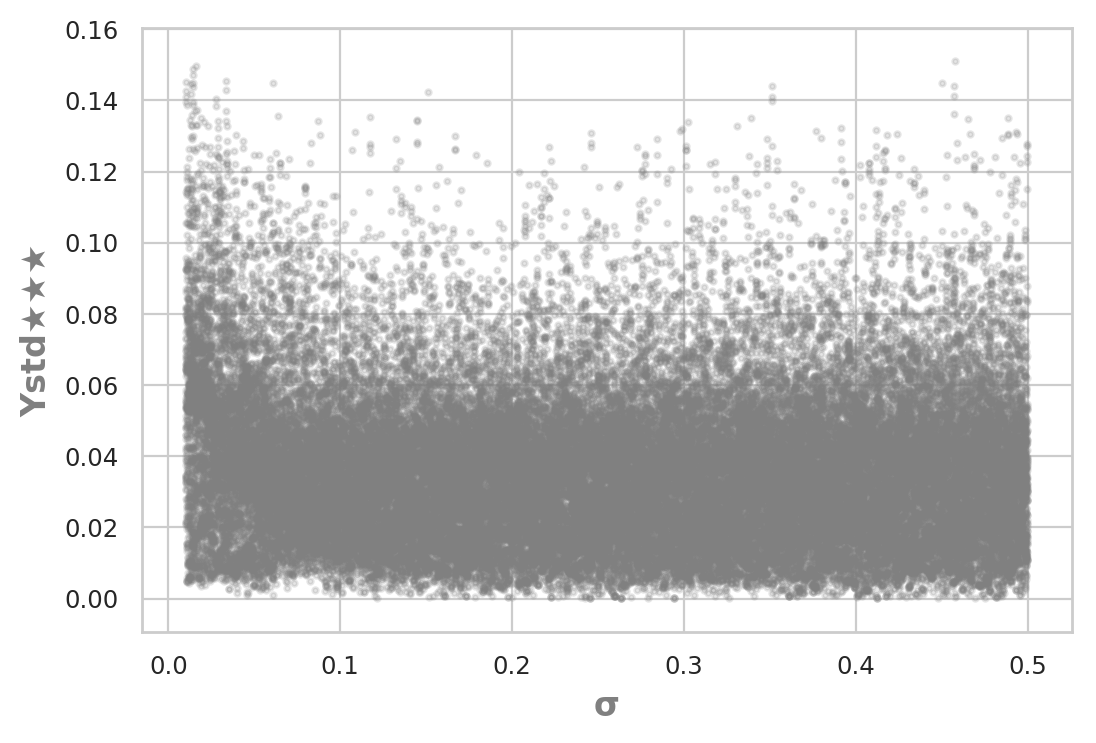

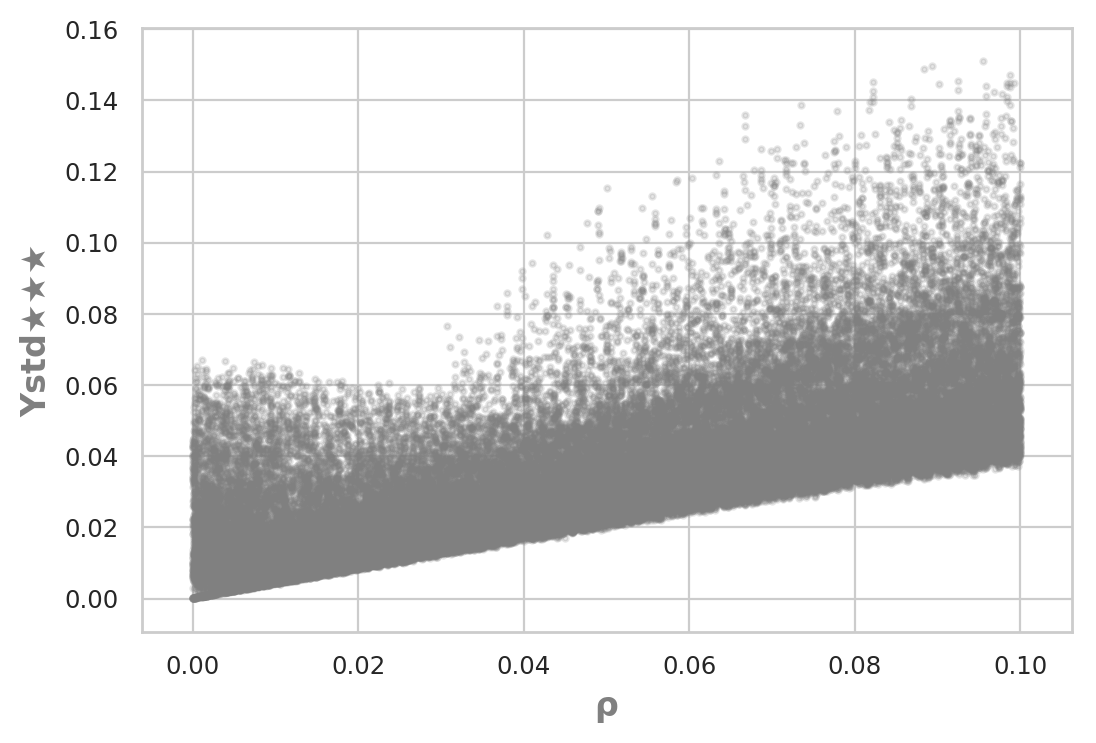

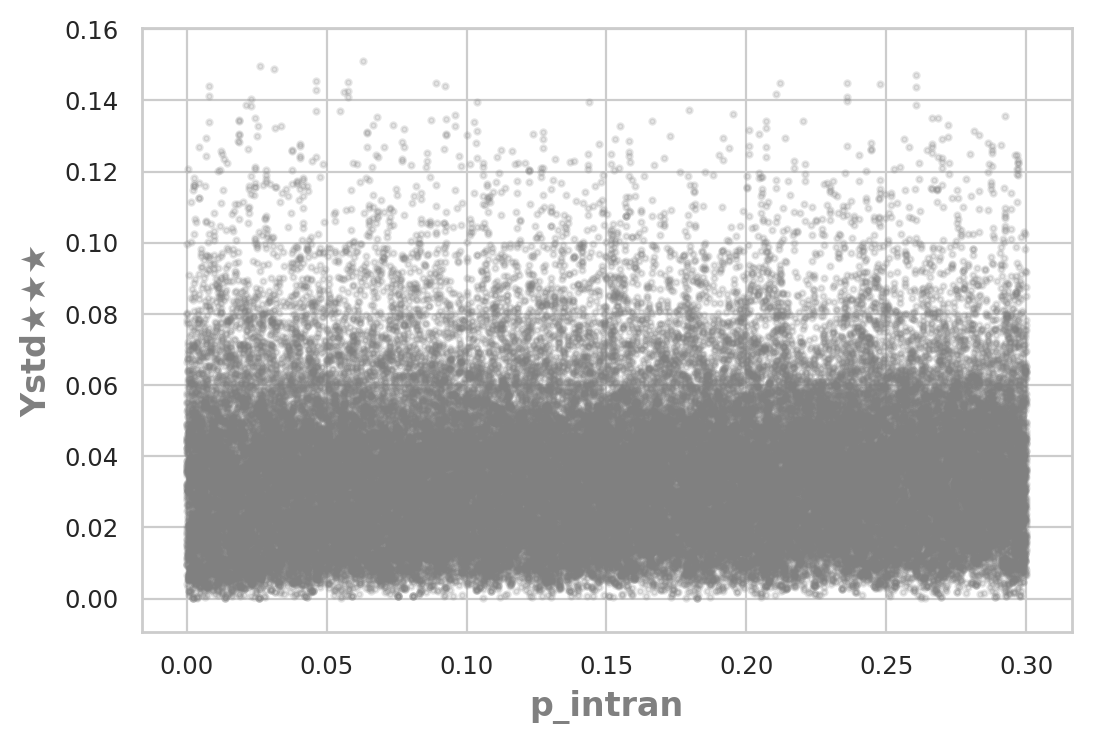

In [6]:
dfregplots(nonandf, "Ystd★", "Ystd*")
dfregplots(nonandf, "Ystd★★", "Ystd**")
dfregplots(nonandf, "Ystd★★★", "Ystd***")

In [8]:
import SALib.analyze.sobol as sobol

#sobol.analyze(problem, result))

In [9]:
indict  = {"num_vars": 6, "names": [ "size_nw",
                         "n_issues", "p", "σ", "ρ", "p_intran"],
           "bounds": [[500, 5000],
                      [2, 10],
                      [0.1, 0.99],
                      [0.01, 0.5],
                      [0.0, 0.1],
                      [0.0, 0.3]]}


In [10]:
indict

{'num_vars': 6,
 'names': ['size_nw', 'n_issues', 'p', 'σ', 'ρ', 'p_intran'],
 'bounds': [[500, 5000],
  [2, 10],
  [0.1, 0.99],
  [0.01, 0.5],
  [0.0, 0.1],
  [0.0, 0.3]]}

In [14]:
sobol.analyze(indict, nonandf["Ystd★"])

RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.